Data wrangling refers to combining, transforming, and re-arranging data to make it suitable for further analysis. We'll use Pandas for all data wrangling operations.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

## Hierarchical indexing

Until now we have seen only a single level of indexing in the rows and columns of a Pandas DataFrame. Hierarchical indexing refers to having multiple index levels on an axis (row / column) of a Pandas DataFrame. It helps us to work with a higher dimensional data in a lower dimensional form. 

### Hierarchical indexing in Pandas Series

Let us define Pandas Series as we defined in Chapter 5:

In [5]:
#Defining a Pandas Series
series_example = pd.Series(['these','are','english','words','estas','son','palabras','en','español',
                            'ce','sont','des','françai','mots'])
series_example

0        these
1          are
2      english
3        words
4        estas
5          son
6     palabras
7           en
8      español
9           ce
10        sont
11         des
12     françai
13        mots
dtype: object

Let us use the attribute `nlevels` to find the number of levels of the row indices of this Series:

In [6]:
series_example.index.nlevels

1

The Series `series_example` has only one level of row indices.

Let us introduce another level of row indices while defining the Series:

In [377]:
#Defining a Pandas Series with multiple levels of row indices
series_example = pd.Series(['these','are','english','words','estas','son','palabras','en','español',
                           'ce','sont','des','françai','mots'], 
                          index=[['English']*4+['Spanish']*5+['French']*5,list(range(1,5))+list(range(1,6))*2])
series_example

English  1       these
         2         are
         3     english
         4       words
Spanish  1       estas
         2         son
         3    palabras
         4          en
         5     español
French   1          ce
         2        sont
         3         des
         4     françai
         5        mots
dtype: object

In the above Series, there are two levels of row indices:

In [378]:
series_example.index.nlevels

2

### Hierarchical indexing in Pandas DataFrame

In a Pandas DataFrame, both the rows and the columns can have hierarchical indexing. For example, consider the DataFrame below:

In [416]:
data=np.array([[771517,2697000,815201,3849000],[4.2,5.6,2.8,4.6],
             [7.8,234.5,46.9,502],[6749, 597, 52, 305]])
df_example = pd.DataFrame(data,index = [['Demographics']*2+['Geography']*2,
                                      ['Population','Unemployment (%)','Area (mile-sq)','Elevation (feet)']],
                    columns = [['Illinois']*2+['California']*2,['Evanston','Chicago','San Francisco','Los Angeles']])
df_example

Illinois               California            
                               Evanston    Chicago San Francisco Los Angeles
Demographics Population        771517.0  2697000.0      815201.0   3849000.0
             Unemployment (%)       4.2        5.6           2.8         4.6
Geography    Area (mile-sq)         7.8      234.5          46.9       502.0
             Elevation (feet)    6749.0      597.0          52.0       305.0

In the above DataFrame, both the rows and columns have 2 levels of indexing. The number of levels of column indices can be found using the attribute `nlevels`:

In [380]:
df_example.columns.nlevels

2

The `columns` attribute will now have a *MultiIndex* datatype in contrast to the *Index* datatype with single level of indexing. The same holds for row indices.

In [381]:
type(df_example.columns)

pandas.core.indexes.multi.MultiIndex

In [382]:
df_example.columns

MultiIndex([(  'Illinois',      'Evanston'),
            (  'Illinois',       'Chicago'),
            ('California', 'San Francisco'),
            ('California',   'Los Angeles')],
           )

The hierarchical levels can have names. Let us assign names to the each level of the row and column labels:

In [417]:
#Naming the row indices levels
df_example.index.names=['Information type', 'Statistic']

#Naming the column indices levels
df_example.columns.names=['State', 'City']

#Viewing the DataFrame
df_example

State                              Illinois               California  \
City                               Evanston    Chicago San Francisco   
Information type Statistic                                             
Demographics     Population        771517.0  2697000.0      815201.0   
                 Unemployment (%)       4.2        5.6           2.8   
Geography        Area (mile-sq)         7.8      234.5          46.9   
                 Elevation (feet)    6749.0      597.0          52.0   

State                                          
City                              Los Angeles  
Information type Statistic                     
Demographics     Population         3849000.0  
                 Unemployment (%)         4.6  
Geography        Area (mile-sq)         502.0  
                 Elevation (feet)       305.0

Observe that the names of the row and column labels appear when we view the DataFrame.

#### [`get_level_values()`](https://pandas.pydata.org/docs/reference/api/pandas.Index.get_level_values.html)

The names of the column levels can be obtained using the function `get_level_values()`. The outer-most level corresponds to the *level = 0*, and it increases as we go to the inner levels.

In [384]:
#Column levels at level 0 (the outer level)
df_example.columns.get_level_values(0)

Index(['Illinois', 'Illinois', 'California', 'California'], dtype='object', name='State')

In [385]:
#Column levels at level 1 (the inner level)
df_example.columns.get_level_values(1)

Index(['Evanston', 'Chicago', 'San Francisco', 'Los Angeles'], dtype='object', name='City')

### Subsetting data

We can use the indices at the outer levels to concisely subset a Series / DataFrame.

The first four observations of the Series `series_example` correspond to the outer row index `English`, while the last 5 rows correspond to the outer row index `Spanish`. Let us subset all the observations corresponding to the outer row index `English`:

In [386]:
#Subsetting data by row-index
series_example['English']

1      these
2        are
3    english
4      words
dtype: object

Just like in the case of single level indices, if we wish to subset corresponding to multiple outer-level indices, we put the indices within an additional box bracket `[]`. For example, let us subset all the observations corresponding to the row-indices `English` and `French`:

In [387]:
#Subsetting data by multiple row-indices
series_example[['English','French']]

English  1      these
         2        are
         3    english
         4      words
French   1         ce
         2       sont
         3        des
         4    françai
         5       mots
dtype: object

We can also subset data using the inner row index. However, we will need to put a `:` sign to indicate that the row label at the inner level is being used.

In [392]:
#Subsetting data by row-index
series_example[:,2]

English     are
Spanish     son
French     sont
dtype: object

In [404]:
#Subsetting data by multiple row-indices
series_example.loc[:,[1,2]]

English  1    these
Spanish  1    estas
French   1       ce
English  2      are
Spanish  2      son
French   2     sont
dtype: object

As in Series, we can concisely subset rows / columns in a DataFrame based on the index at the outer levels.

In [418]:
df_example['Illinois']

City                               Evanston    Chicago
Information type Statistic                            
Demographics     Population        771517.0  2697000.0
                 Unemployment (%)       4.2        5.6
Geography        Area (mile-sq)         7.8      234.5
                 Elevation (feet)    6749.0      597.0

Note that the dataype of each column name is a tuple. For example, let us find the datatype of the $1^{st}$ column name:

In [223]:
#First column name
df_example.columns[0]

('Illinois', 'Evanston')

In [220]:
#Datatype of first column name
type(df_example.columns[0])

tuple

Thus columns at the inner levels can be accessed by specifying the name as a tuple. For example, let us subset the column `Evanston`:

In [419]:
#Subsetting the column 'Evanston'
df_example[('Illinois','Evanston')]

Information type  Statistic       
Demographics      Population          771517.0
                  Unemployment (%)         4.2
Geography         Area (mile-sq)           7.8
                  Elevation (feet)      6749.0
Name: (Illinois, Evanston), dtype: float64

In [420]:
#Subsetting the columns 'Evanston' and 'Chicago' of the outer column level 'Illinois'
df_example.loc[:,('Illinois',['Evanston','Chicago'])]

State                              Illinois           
City                               Evanston    Chicago
Information type Statistic                            
Demographics     Population        771517.0  2697000.0
                 Unemployment (%)       4.2        5.6
Geography        Area (mile-sq)         7.8      234.5
                 Elevation (feet)    6749.0      597.0

### Practice exercise 1

Read the table consisting of GDP per capita of countries from the webpage: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita . 

To only read the relevant table, read the tables that contain the word *'Country'*. 

#### 
How many levels of indexing are there in the rows and columns?

In [8]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita', match = 'Country')
gdp_per_capita = dfs[0]
gdp_per_capita.head()

Country/Territory UN Region   IMF[4]       World Bank[5]        \
  Country/Territory UN Region Estimate  Year      Estimate  Year   
0   Liechtenstein *    Europe        —     —        169049  2019   
1          Monaco *    Europe        —     —        173688  2020   
2      Luxembourg *    Europe   127673  2022        135683  2021   
3         Bermuda *  Americas        —     —        110870  2021   
4         Ireland *    Europe   102217  2022         99152  2021   

  United Nations[6]        
           Estimate  Year  
0            180227  2020  
1            173696  2020  
2            117182  2020  
3            123945  2020  
4             86251  2020

Just by looking at the DataFrame, it seems as if there are two levels of indexing for columns and one level of indexing for rows. However, let us confirm it with the `nlevels` attribute.

In [7]:
gdp_per_capita.columns.nlevels

2

Yes, there are 2 levels of indexing for columns.

In [6]:
gdp_per_capita.index.nlevels

1

There is one level of indexing for rows.

#### 
Subset a DataFrame that selects the country, and the United Nations' estimates of GDP per capita with the corresponding year.

In [9]:
gdp_per_capita.loc[:,['Country/Territory','United Nations[6]']]

Country/Territory United Nations[6]      
              Country/Territory          Estimate  Year
0               Liechtenstein *            180227  2020
1                      Monaco *            173696  2020
2                  Luxembourg *            117182  2020
3                     Bermuda *            123945  2020
4                     Ireland *             86251  2020
..                          ...               ...   ...
217                Madagascar *               470  2020
218  Central African Republic *               481  2020
219              Sierra Leone *               475  2020
220               South Sudan *              1421  2020
221                   Burundi *               286  2020

[222 rows x 3 columns]

#### 
Subset a DataFrame that selects only the World Bank and United Nations' estimates of GDP per capita without the corresponding year or country.

In [10]:
gdp_per_capita.loc[:,(['World Bank[5]','United Nations[6]'],'Estimate')]

,World Bank[5],United Nations[6]
,Estimate,Estimate
0,169049,180227
1,173688,173696
2,135683,117182
3,110870,123945
4,99152,86251
...,...,...
217,515,470
218,512,481
219,516,475


#### 
Subset a DataFrame that selects the country and only the World Bank and United Nations' estimates of GDP per capita without the corresponding year or country.

In [11]:
gdp_per_capita.loc[:,[('Country/Territory','Country/Territory'),('United Nations[6]','Estimate'),('World Bank[5]','Estimate')]]

,Country/Territory,United Nations[6],World Bank[5]
,Country/Territory,Estimate,Estimate
0,Liechtenstein *,180227,169049
1,Monaco *,173696,173688
2,Luxembourg *,117182,135683
3,Bermuda *,123945,110870
4,Ireland *,86251,99152
...,...,...,...
217,Madagascar *,470,515
218,Central African Republic *,481,512
219,Sierra Leone *,475,516


#### 
Drop all columns consisting of years. Use the `level` argument of the `drop()` method.

In [12]:
gdp_per_capita = gdp_per_capita.drop(columns='Year',level=1)
gdp_per_capita

,Country/Territory,UN Region,IMF[4],World Bank[5],United Nations[6]
,Country/Territory,UN Region,Estimate,Estimate,Estimate
0,Liechtenstein *,Europe,—,169049,180227
1,Monaco *,Europe,—,173688,173696
2,Luxembourg *,Europe,127673,135683,117182
3,Bermuda *,Americas,—,110870,123945
4,Ireland *,Europe,102217,99152,86251
...,...,...,...,...,...
217,Madagascar *,Africa,522,515,470
218,Central African Republic *,Africa,496,512,481
219,Sierra Leone *,Africa,494,516,475


#### 
In the dataset obtained above, drop the inner level of the column labels. Use the [`droplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.droplevel.html) method.

In [14]:
gdp_per_capita = gdp_per_capita.droplevel(1,axis=1)
gdp_per_capita

,Country/Territory,UN Region,IMF[4],World Bank[5],United Nations[6]
0,Liechtenstein *,Europe,—,169049,180227
1,Monaco *,Europe,—,173688,173696
2,Luxembourg *,Europe,127673,135683,117182
3,Bermuda *,Americas,—,110870,123945
4,Ireland *,Europe,102217,99152,86251
...,...,...,...,...,...
217,Madagascar *,Africa,522,515,470
218,Central African Republic *,Africa,496,512,481
219,Sierra Leone *,Africa,494,516,475
220,South Sudan *,Africa,328,1120,1421


### Practice exercise 2

Recall problem [2(e)](https://nustat.github.io/DataScience_Intro_python/Assignment%203%20(Pandas).html#e-1) from assignment 3 on Pandas, where we needed to find the African country that is the closest to country $G$ (Luxembourg) with regard to social indicators. 

We will solve the question with the regular way in which we use single level of indexing (as you probably did during this assignment), and see if it is easier to do with hierarchical indexing.

Execute the code below that we used to pre-process data to make it suitable for answering this question.

In [17]:
#Pre-processing data - execute this code
social_indicator = pd.read_csv("./Datasets/social_indicator.txt",sep="\t",index_col = 0)
social_indicator.geographic_location = social_indicator.geographic_location.apply(lambda x: 'Asia' if 'Asia' in x else 'Europe' if 'Europe' in x else 'Africa' if 'Africa' in x else x)
social_indicator.rename(columns={'geographic_location':'continent'},inplace=True)
social_indicator = social_indicator.sort_index(axis=1)
social_indicator.drop(columns=['region','contraception'],inplace=True)

Below is the code to find the African country that is the closest to country $G$ (Luxembourg) using single level of indexing. Your code in the assignment is probably similar to the one below:

In [344]:
#Finding the index of the country G (Luxembourg) that has the maximum GDP per capita
country_max_gdp_position = social_indicator.gdpPerCapita.argmax()

#Scaling the social indicator dataset
social_indicator_scaled = social_indicator.iloc[:,2:].apply(lambda x: (x-x.mean())/(x.std()))

#Computing the Manhattan distances of all countries from country G (Luxembourg)
manhattan_distances = (social_indicator_scaled-social_indicator_scaled.iloc[country_max_gdp_position,:]).abs().sum(axis=1)

#Finding the indices of African countries
african_countries_indices = social_indicator.loc[social_indicator.continent=='Africa',:].index

#Filtering the Manhattan distances of African countries from country G (Luxembourg)
manhattan_distances_African = manhattan_distances[african_countries_indices]

#Finding the country among African countries that has the least Manhattan distance to country G (Luxembourg)
social_indicator.loc[manhattan_distances_African.idxmin(),'country']

'Reunion'

#### 

Use the method [`set_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) to set `continent` and `country` as hierarchical indices of rows. Find the African country that is the closest to country $G$ (Luxembourg) using this hierarchically indexed data. How many lines will be eliminated from the code above? Which lines will be eliminated?

**Hint:** Since `continent` and `country` are row indices, you don't need to explicitly find:

1. The row index of country $G$ (Luxembourg),

2. The row indices of African countries.

3. The Manhattan distances for African countries.

In [18]:
social_indicator.set_index(['continent','country'],inplace = True)
social_indicator_scaled = social_indicator.apply(lambda x: (x-x.mean())/(x.std()))
manhattan_distances = (social_indicator_scaled-social_indicator_scaled.loc[('Europe','Luxembourg'),:]).abs().sum(axis=1)
manhattan_distances['Africa'].idxmin()

'Reunion'

As we have converted the columns `continent` and `country` to row indices, all the lines of code where we were keeping track of the index of country $G$, African countries, and Manhattan distances of African countries are eliminated. Three lines of code are eliminated.

Hierarchical indexing relieves us from keeping track of indices, if we set indices that are relatable to our analysis.

#### 
Use the Pandas DataFrame method [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) with the *level* argument to find the mean value of all social indicators for each continent.

In [350]:
social_indicator.mean(level=0)

,economicActivityFemale,economicActivityMale,gdpPerCapita,illiteracyFemale,illiteracyMale,infantMortality,lifeFemale,lifeMale,totalfertilityrate
continent,,,,,,,,,
Asia,41.592683,79.282927,27796.390244,23.635951,13.780878,39.853659,70.724390,66.575610,3.482927
Africa,46.732258,79.445161,7127.483871,52.907226,33.673548,77.967742,56.841935,53.367742,4.889677
Oceania,51.280000,77.953333,14525.666667,9.666667,6.585200,23.666667,72.406667,67.813333,3.509333
North America,45.238095,77.166667,18609.047619,17.390286,14.609905,22.904762,75.457143,70.161905,2.804286
South America,42.008333,75.575000,15925.916667,9.991667,6.750000,34.750000,72.691667,66.975000,2.872500
Europe,52.060000,70.291429,45438.200000,2.308343,1.413543,10.571429,77.757143,70.374286,1.581714


### Practice exercise 3

Let us try to find the areas where NU students lack in diversity. Read *survey_data_clean.csv*. Use hierarchical indexing to classify the columns as follows:

Classify the following variables as *lifestyle*:

In [9]:
lifestyle = ['fav_alcohol', 'parties_per_month', 'smoke', 'weed','streaming_platforms', 'minutes_ex_per_week',
       'sleep_hours_per_day', 'internet_hours_per_day', 'procrastinator', 'num_clubs','student_athlete','social_media']

Classify the following variables as *personality*:

In [10]:
personality = ['introvert_extrovert', 'left_right_brained', 'personality_type', 
       'num_insta_followers', 'fav_sport','learning_style','dominant_hand']

Classify the following variables as *opinion*:

In [11]:
opinion = ['love_first_sight', 'expected_marriage_age',  'expected_starting_salary', 'how_happy', 
       'fav_number', 'fav_letter', 'fav_season',   'political_affliation', 'cant_change_math_ability',
       'can_change_math_ability', 'math_is_genetic', 'much_effort_is_lack_of_talent']

Classify the following variables as *academic information*:

In [12]:
academic_info = ['major', 'num_majors_minors',
       'high_school_GPA', 'NU_GPA', 'school_year','AP_stats', 'used_python_before']

Classify the following variables as *demographics*:

In [13]:
demographics = [ 'only_child','birth_month', 
       'living_location_on_campus', 'age', 'height', 'height_father',
       'height_mother',  'childhood_in_US', 'gender', 'region_of_residence']

Write a function that finds the number of variables having outliers in a dataset. Apply the function to each of the 5 categories of variables in the dataset. Our hypothesis is that the category that has the maximum number of variables with outliers has the least amount of diversity. For continuous variables, use Tukey's fences criterion to identify outliers. For categorical variables, consider levels having less than 1% observations as outliers. Assume that numeric variables that have more than 2 distinct values are continuous.

**Solution:**

In [71]:
#Using hierarchical indexing to classify columns

#Reading data
survey_data = pd.read_csv('./Datasets/survey_data_clean.csv')

#Arranging columns in the order of categories
survey_data_HI = survey_data[lifestyle+personality+opinion+academic_info+demographics]

#Creating hierarchical indexing to classify columns
survey_data_HI.columns=[['lifestyle']*len(lifestyle)+['personality']*len(personality)+['opinion']*len(opinion)+\
                       ['academic_info']*len(academic_info)+['demographics']*len(demographics),lifestyle+\
                        personality+opinion+academic_info+demographics]

In [73]:
#Function to identify outliers based on Tukey's fences for continous variables and 1% criterion for categorical variables
def rem_outliers(x):
    if ((len(x.value_counts())>2) & (x.dtype!='O')):#continuous variable
        q1 =x.quantile(0.25)
        q3 = x.quantile(0.75)
        intQ_range = q3-q1

        #Tukey's fences
        Lower_fence = q1 - 1.5*intQ_range
        Upper_fence = q3 + 1.5*intQ_range

        num_outliers = ((x<Lower_fence) | (x>Upper_fence)).sum()
        if num_outliers>0:
            return True
        return False
    else:                                       #categorical variable
        if np.min(x.value_counts()/len(x))<0.01:
            return True
        return False

In [74]:
#Number of variables containing outlier(s) in each category
for category in survey_data_HI.columns.get_level_values(0).unique():
    print("Number of missing values for category ",category," = ",survey_data_HI[category].apply(rem_outliers).sum())

Number of missing values for category  lifestyle  =  7
Number of missing values for category  personality  =  2
Number of missing values for category  opinion  =  4
Number of missing values for category  academic_info  =  3
Number of missing values for category  demographics  =  4


The *lifestyle* category has the highest number of variables containing outlier(s). If the hypothesis is true, then NU students have the least diversity in their lifestyle, among all the categories.

Although one may say that the *lifestyle* category has the the highest number of columns (as shown below), the proportion of columns having outlier(s) is also the highest for this category.

In [70]:
for category in survey_data_HI.columns.get_level_values(0).unique():
    print("Number of columns in category ",category," = ",survey_data_HI[category].shape[1])

Number of columns in category  lifestyle  =  12
Number of columns in category  personality  =  7
Number of columns in category  opinion  =  12
Number of columns in category  academic_info  =  7
Number of columns in category  demographics  =  10


### Reshaping data

Apart from ease in subsetting data, hierarchical indexing also plays a role in reshaping data.

#### [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unstack.html) (Pandas Series method)
The Pandas Series method `unstack()` pivots the desired level of row indices to columns, thereby creating a DataFrame. By default, the inner-most level of the row labels is pivoted.

In [52]:
#Pivoting the inner-most Series row index to column labels
series_example_unstack = series_example.unstack()
series_example_unstack

,1,2,3,4,5
English,these,are,english,words,NaN
French,ce,sont,des,françai,mots
Spanish,estas,son,palabras,en,español


We can pivot the outer level of the row labels by specifying it in the `level` argument:

In [192]:
#Pivoting the outer row indices to column labels
series_example_unstack = series_example.unstack(level=0)
series_example_unstack

,English,French,Spanish
1,these,ce,estas
2,are,sont,son
3,english,des,palabras
4,words,françai,en
5,NaN,mots,español


#### [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html) (Pandas DataFrame method)
The Pandas DataFrame method `unstack()` pivots the specified level of row indices to the new inner-most level of column labels. By default, the inner-most level of the row labels is pivoted.

In [181]:
#Pivoting the inner level of row labels to the inner-most level of column labels
df_example.unstack()

State                  Illinois                                                \
City                   Evanston                                                 
Statistic        Area (mile-sq) Elevation (feet) Population Unemployement (%)   
Information type                                                                
Demographics                NaN              NaN   771517.0               4.2   
Geography                   7.8           6749.0        NaN               NaN   

State                                                                          \
City                    Chicago                                                 
Statistic        Area (mile-sq) Elevation (feet) Population Unemployement (%)   
Information type                                                                
Demographics                NaN              NaN  2697000.0               5.6   
Geography                 234.5            597.0        NaN               NaN   

State                California                                                \
City              San Francisco                                                 
Statistic        Area (mile-sq) Elevation (feet) Population Unemployement (%)   
Information type                                                                
Demographics                NaN              NaN   815201.0               2.8   
Geography                  46.9             52.0        NaN               NaN   

State                                                                          
City                Los Angeles                                                
Statistic        Area (mile-sq) Elevation (feet) Population Unemployement (%)  
Information type                                                               
Demographics                NaN              NaN  3849000.0               4.6  
Geography                 502.0            305.0        NaN               NaN

As with Series, we can pivot the outer level of the row labels by specifying it in the `level` argument:

In [188]:
#Pivoting the outer level (level = 0) of row labels to the inner-most level of column labels
df_example.unstack(level=0)

State                 Illinois                                     California  \
City                  Evanston                Chicago           San Francisco   
Information type  Demographics Geography Demographics Geography  Demographics   
Statistic                                                                       
Area (mile-sq)             NaN       7.8          NaN     234.5           NaN   
Elevation (feet)           NaN    6749.0          NaN     597.0           NaN   
Population            771517.0       NaN    2697000.0       NaN      815201.0   
Unemployement (%)          4.2       NaN          5.6       NaN           2.8   

State                                               
City                         Los Angeles            
Information type  Geography Demographics Geography  
Statistic                                           
Area (mile-sq)         46.9          NaN     502.0  
Elevation (feet)       52.0          NaN     305.0  
Population              NaN    3849000.0       NaN  
Unemployement (%)       NaN          4.6       NaN

#### `stack()`

The inverse of `unstack()` is the [`stack()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html) method, which creates the inner-most level of row indices by pivoting the column labels of the prescribed level.

Note that if the column labels have only one level, we don't need to specify a level. 

In [66]:
#Stacking the columns of a DataFrame
series_example_unstack.stack()

English  1       these
         2         are
         3     english
         4       words
French   1          ce
         2        sont
         3         des
         4     françai
         5        mots
Spanish  1       estas
         2         son
         3    palabras
         4          en
         5     español
dtype: object

However, if the columns have multiple levels, we can specify the level to stack as the inner-most row level. By default, the inner-most column level is stacked.

In [195]:
#Stacking the inner-most column labels inner-most row indices
df_example.stack()

State                                             California   Illinois
Information type Statistic         City                                
Demographics     Population        Chicago               NaN  2697000.0
                                   Evanston              NaN   771517.0
                                   Los Angeles     3849000.0        NaN
                                   San Francisco    815201.0        NaN
                 Unemployement (%) Chicago               NaN        5.6
                                   Evanston              NaN        4.2
                                   Los Angeles           4.6        NaN
                                   San Francisco         2.8        NaN
Geography        Area (mile-sq)    Chicago               NaN      234.5
                                   Evanston              NaN        7.8
                                   Los Angeles         502.0        NaN
                                   San Francisco        46.9        NaN
                 Elevation (feet)  Chicago               NaN      597.0
                                   Evanston              NaN     6749.0
                                   Los Angeles         305.0        NaN
                                   San Francisco        52.0        NaN

In [196]:
#Stacking the outer column labels inner-most row indices
df_example.stack(level=0)

City                                             Chicago  Evanston  \
Information type Statistic         State                             
Demographics     Population        California        NaN       NaN   
                                   Illinois    2697000.0  771517.0   
                 Unemployement (%) California        NaN       NaN   
                                   Illinois          5.6       4.2   
Geography        Area (mile-sq)    California        NaN       NaN   
                                   Illinois        234.5       7.8   
                 Elevation (feet)  California        NaN       NaN   
                                   Illinois        597.0    6749.0   

City                                           Los Angeles  San Francisco  
Information type Statistic         State                                   
Demographics     Population        California    3849000.0       815201.0  
                                   Illinois            NaN            NaN  
                 Unemployement (%) California          4.6            2.8  
                                   Illinois            NaN            NaN  
Geography        Area (mile-sq)    California        502.0           46.9  
                                   Illinois            NaN            NaN  
                 Elevation (feet)  California        305.0           52.0  
                                   Illinois            NaN            NaN

## Merging data

The Pandas DataFrame method [merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) uses columns defined as *key* column(s) to merge two datasets. In case the *key* column(s) are not defined, the overlapping column(s) are considered as the *key* columns.

### Join types

When a dataset is merged with another based on *key* column(s), one of the following four types of join will occur depending on the repetition of the values of the key(s) in the datasets.

(i) One-to-one, (ii) Many-to-one, (iii) One-to-Many, and (iv) Many-to-many

The type of join may sometimes determine the number of rows to be obtained in the merged dataset. If we don't get the expected number of rows in the merged dataset, an investigation of the datsets may be neccessary to identify and resolve the issue. There may be several possible issues, for example, the dataset may not be arranged in a way that we have assumed it to be arranged.

We'll use toy datasets to understand the above types of joins. The *.csv* files with the prefix *student* consist of the names of a few students along with their majors, and the files with the prefix *skills* consist of the names of majors along with the skills imparted by the respective majors.

In [22]:
data_student = pd.read_csv('./Datasets/student_one.csv')
data_skill = pd.read_csv('./Datasets/skills_one.csv')

#### One-to-one join
Each row in one dataset is linked (or related) to a single row in another dataset based on the key column(s). 

In [23]:
data_student

,Student,Major
0,Kitana,Statistics
1,Jax,Computer Science
2,Sonya,Material Science
3,Johnny,Music


In [24]:
data_skill

,Major,Skills
0,Statistics,Inference
1,Computer Science,Machine learning
2,Material Science,Structure prediction
3,Music,Opera


In [25]:
pd.merge(data_student,data_skill)

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Jax,Computer Science,Machine learning
2,Sonya,Material Science,Structure prediction
3,Johnny,Music,Opera


#### Many-to-one join
One or more rows in one dataset is linked (or related) to a single row in another dataset based on the key column(s).

In [70]:
data_student = pd.read_csv('./Datasets/student_many.csv')
data_skill = pd.read_csv('./Datasets/skills_one.csv')

In [71]:
data_student

,Student,Major
0,Kitana,Statistics
1,Kitana,Computer Science
2,Jax,Computer Science
3,Sonya,Material Science
4,Johnny,Music
5,Johnny,Statistics


In [72]:
data_skill

,Major,Skills
0,Statistics,Inference
1,Computer Science,Machine learning
2,Material Science,Structure prediction
3,Music,Opera


In [33]:
pd.merge(data_student,data_skill)

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Johnny,Statistics,Inference
2,Kitana,Computer Science,Machine learning
3,Jax,Computer Science,Machine learning
4,Sonya,Material Science,Structure prediction
5,Johnny,Music,Opera


#### One-to-many join
Each row in one dataset is linked (or related) to one, or more rows in another dataset based on the key column(s).

In [34]:
data_student = pd.read_csv('./Datasets/student_one.csv')
data_skill = pd.read_csv('./Datasets/skills_many.csv')

In [35]:
data_student

,Student,Major
0,Kitana,Statistics
1,Jax,Computer Science
2,Sonya,Material Science
3,Johnny,Music


In [36]:
data_skill

,Major,Skills
0,Statistics,Inference
1,Statistics,Modeling
2,Computer Science,Machine learning
3,Computer Science,Computing
4,Material Science,Structure prediction
5,Music,Opera
6,Music,Pop
7,Music,Classical


In [37]:
pd.merge(data_student,data_skill)

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Kitana,Statistics,Modeling
2,Jax,Computer Science,Machine learning
3,Jax,Computer Science,Computing
4,Sonya,Material Science,Structure prediction
5,Johnny,Music,Opera
6,Johnny,Music,Pop
7,Johnny,Music,Classical


#### Many-to-many join
One, or more, rows in one dataset is linked (or related) to one, or more, rows in another dataset using the key column(s).

In [73]:
data_student = pd.read_csv('./Datasets/student_many.csv')
data_skill = pd.read_csv('./Datasets/skills_many.csv')

In [74]:
data_student

,Student,Major
0,Kitana,Statistics
1,Kitana,Computer Science
2,Jax,Computer Science
3,Sonya,Material Science
4,Johnny,Music
5,Johnny,Statistics


In [75]:
data_skill

,Major,Skills
0,Statistics,Inference
1,Statistics,Modeling
2,Computer Science,Machine learning
3,Computer Science,Computing
4,Material Science,Structure prediction
5,Music,Opera
6,Music,Pop
7,Music,Classical


In [82]:
pd.merge(data_student,data_skill)

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Kitana,Statistics,Modeling
2,Johnny,Statistics,Inference
3,Johnny,Statistics,Modeling
4,Kitana,Computer Science,Machine learning
5,Kitana,Computer Science,Computing
6,Jax,Computer Science,Machine learning
7,Jax,Computer Science,Computing
8,Sonya,Material Science,Structure prediction
9,Johnny,Music,Opera


Note that there are two '*Statistics*' rows in `data_student`, and two '*Statistics*' rows in `data_skill`, resulting in 2x2 = 4 '*Statistics*' rows in the merged data. The same is true for the '*Computer Science*' `Major`.

### Join types with `how` argument

The above mentioned types of join (one-to-one, many-to-one, etc.) occur depening on the structure of the datasets being merged. We don't have control over the type of join. However, we can control `how` the joins are occurring. We can merge (or *join*) two datasets in one of the following four ways:


(i) `inner` join, (ii) `left` join, (iii) `right` join, (iv) `outer` join

#### inner join
This is the join that occurs by default, i.e., without specifying the `how` argument in the `merge()` function. In `inner` join, only those observations are merged that have the same value(s) in the *key* column(s) of both the datasets.

In [42]:
data_student = pd.read_csv('./Datasets/student_how.csv')
data_skill = pd.read_csv('./Datasets/skills_how.csv')

In [43]:
data_student

,Student,Major
0,Kitana,Statistics
1,Jax,Computer Science
2,Sonya,Material Science


In [44]:
data_skill

,Major,Skills
0,Statistics,Inference
1,Computer Science,Machine learning
2,Music,Opera


In [395]:
pd.merge(data_student,data_skill)

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Jax,Computer Science,Machine learning


**When you may use inner join?**
You should use inner join when you cannot carry out the analysis unless the observation corresponding to the *key column(s)* is present in both the tables.

**Example:** Suppose you wish to analyze the association between vaccinations and covid infection rate based on country-level data. In one of the datasets, you have the infection rate for each country, while in the other one you have the number of vaccinations in each country. The countries which have either the vaccination or the infection rate missing, cannot help analyze the association. In such as case you may be interested only in countries that have values for both the variables. Thus, you will  use inner join to discard the countries with either value missing.

#### left join
In `left` join, the merged dataset will have all the rows of the dataset that is specified first in the `merge()` function. Only those observations of the other dataset will be merged whose value(s) in the *key* column(s) exist in the dataset specified first in the `merge()` function.

In [85]:
pd.merge(data_student,data_skill,how='left')

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Jax,Computer Science,Machine learning
2,Sonya,Material Science,NaN


**When you may use left join?**
You should use left join when the primary variable(s) of interest are present in the one of the datasets, and whose missing values cannot be imputed. The variable(s) in the other dataset may not be as important or it may be possible to reasonably impute their values, if missing corresponding to the observation in the primary dataset.

**Examples:** 

1) Suppose you wish to analyze the association between the covid infection rate and the government effectiveness score (a metric used to determine the effectiveness of the government in implementing policies, upholding law and order etc.) based on the data of all countries. Let us say that one of the datasets contains the covid infection rate, while the other one contains the government effectiveness score for each country. If the infection rate for a country is missing, it might be hard to impute. However, the government effectiveness score may be easier to impute based on GDP per capita, crime rate etc. - information that is easily available online. In such a case, you may wish to use a left join where you keep all the countries for which the infection rate is known.

2) Suppose you wish to analyze the association between demographics such as age, income etc. and the amount of credit card spend. Let us say one of the datasets contains the demographic information of each customer, while the other one contains the credit card spend for the customers who made at least one purchase. In such as case, you may want to do a left join as customers not making any purchase might be absent in the card spend data. Their spend can be imputed as zero after merging the datasets.

#### right join
In `right` join, the merged dataset will have all the rows of the dataset that is specified second in the `merge()` function. Only those observations of the other dataset will be merged whose value(s) in the *key* column(s) exist in the  dataset specified second in the `merge()` function.

In [86]:
pd.merge(data_student,data_skill,how='right')

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Jax,Computer Science,Machine learning
2,NaN,Music,Opera


**When you may use right join?**
You can always use a left join instead of a right join. Their purpose is the same.

#### outer join
In `outer` join, the merged dataset will have all the rows of both the datasets being merged.

In [335]:
pd.merge(data_student,data_skill,how='outer')

,Student,Major,Skills
0,Kitana,Statistics,Inference
1,Jax,Computer Science,Machine learning
2,Sonya,Material Science,NaN
3,NaN,Music,Opera


**When you may use outer join?**
You should use an outer join when you cannot afford to lose data present in either of the tables. All the other joins may result in loss of data.

**Example:**
Suppose I took two course surveys for this course. If I need to analyze student sentiment during the course, I will take an outer join of both the surveys. Assume that each survey is a dataset, where each row corresponds to a unique student. Even if a student has answered one of the two surverys, it will be indicative of the sentiment, and will be useful to keep in the merged dataset.

## Concatenating datasets

The Pandas DataFrame method [`concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) is used to stack datasets along an axis. The method is similar to NumPy's `concatenate()` method.

**Example**: You are given the life expectancy data of each continent as a separate \*.csv file. Visualize the change of life expectancy over time for different continents.

In [4]:
data_asia = pd.read_csv('./Datasets/gdp_lifeExpec_Asia.csv')
data_europe = pd.read_csv('./Datasets/gdp_lifeExpec_Europe.csv')
data_africa = pd.read_csv('./Datasets/gdp_lifeExpec_Africa.csv')
data_oceania = pd.read_csv('./Datasets/gdp_lifeExpec_Oceania.csv')
data_americas = pd.read_csv('./Datasets/gdp_lifeExpec_Americas.csv')

In [5]:
#Appending all the data files, i.e., stacking them on top of each other
data_all_continents = pd.concat([data_asia,data_europe,data_africa,data_oceania,data_americas],keys = ['Asia','Europe','Africa','Oceania','Americas'])
data_all_continents

country  year  lifeExp       pop     gdpPercap
Asia     0    Afghanistan  1952   28.801   8425333    779.445314
         1    Afghanistan  1957   30.332   9240934    820.853030
         2    Afghanistan  1962   31.997  10267083    853.100710
         3    Afghanistan  1967   34.020  11537966    836.197138
         4    Afghanistan  1972   36.088  13079460    739.981106
...                   ...   ...      ...       ...           ...
Americas 295    Venezuela  1987   70.190  17910182   9883.584648
         296    Venezuela  1992   71.150  20265563  10733.926310
         297    Venezuela  1997   72.146  22374398  10165.495180
         298    Venezuela  2002   72.766  24287670   8605.047831
         299    Venezuela  2007   73.747  26084662  11415.805690

[1704 rows x 5 columns]

Let's have the continent as a column as we need to use that in the visualization.

In [6]:
data_all_continents.reset_index(inplace = True)

In [7]:
data_all_continents.head()

,level_0,level_1,country,year,lifeExp,pop,gdpPercap
0,Asia,0,Afghanistan,1952,28.801,8425333,779.445314
1,Asia,1,Afghanistan,1957,30.332,9240934,820.853030
2,Asia,2,Afghanistan,1962,31.997,10267083,853.100710
3,Asia,3,Afghanistan,1967,34.020,11537966,836.197138
4,Asia,4,Afghanistan,1972,36.088,13079460,739.981106


In [8]:
data_all_continents.drop(columns = 'level_1',inplace = True)
data_all_continents.rename(columns = {'level_0':'continent'},inplace = True)
data_all_continents.head()

,continent,country,year,lifeExp,pop,gdpPercap
0,Asia,Afghanistan,1952,28.801,8425333,779.445314
1,Asia,Afghanistan,1957,30.332,9240934,820.853030
2,Asia,Afghanistan,1962,31.997,10267083,853.100710
3,Asia,Afghanistan,1967,34.020,11537966,836.197138
4,Asia,Afghanistan,1972,36.088,13079460,739.981106


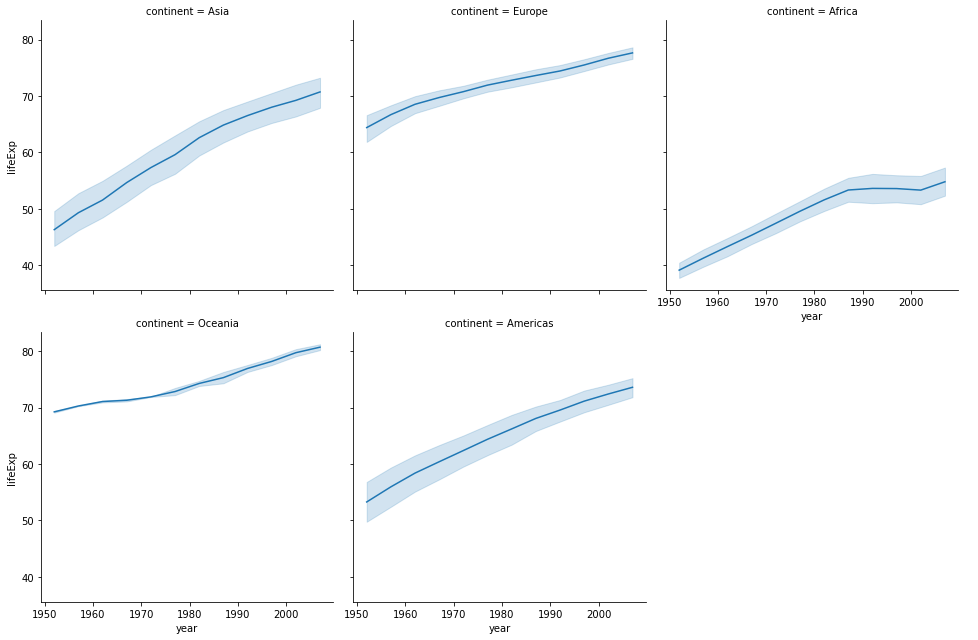

In [89]:
#change of life expectancy over time for different continents
a = sns.FacetGrid(data_all_continents,col = 'continent',col_wrap = 3,height = 4.5,aspect = 1)#height = 3,aspect = 0.8)
a.map(sns.lineplot,'year','lifeExp')
a.add_legend()

In the above example, datasets were appended (or stacked on top of each other).

Datasets can also be concatenated side-by-side (by providing the argument *axis = 1* with the *concat()* function) as we saw with the *merge* function.

### Practice exercise 4

Read the documentations of the Pandas DataFrame methods `merge()` and `concat()`, and identify the differences. Mention examples when you can use (i) either, (ii) only `concat()`, (iii) only `merge()`

**Solution:**

(i) If we need to merge datasets using row indices, we can use either function.

(ii) If we need to stack datasets one on top of the other, we can only use `concat()`

(iii) If we need to merge datasets using overlapping columns we can only use `merge()`

## Reshaping data

Data often needs to be re-arranged to ease analysis.

### Pivoting "long" to "wide" format

#### [`pivot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html) {-}
This function helps re-arrange data from the *'long'* form to a *'wide'* form. 

**Example:** Let us consider the dataset `data_all_continents` obtained in the previous section after concatenating the data of all the continents. 

In [51]:
data_all_continents.head()

,continent,country,year,lifeExp,pop,gdpPercap
0,Asia,Afghanistan,1952,28.801,8425333,779.445314
1,Asia,Afghanistan,1957,30.332,9240934,820.853030
2,Asia,Afghanistan,1962,31.997,10267083,853.100710
3,Asia,Afghanistan,1967,34.020,11537966,836.197138
4,Asia,Afghanistan,1972,36.088,13079460,739.981106


#### Pivoting a single column

For visualizing life expectancy in 2007 against life expectancy in 1957, we will need to filter the data, and then make the plot. Everytime that we need to compare a metric for a year against another year, we will need to filter the data. 

If we need to often compare metrics of a year against another year, it will be easier to have each year as a separate column, instead of having all years in a single column.

As we are increasing the number of columns and decreasing the number of rows, we are re-arranging the data from *long*-form to *wide*-form.

In [113]:
data_wide = data_all_continents.pivot(index = ['continent','country'],columns = 'year',values = 'lifeExp')

In [56]:
data_wide.head()

year                      1952    1957    1962    1967    1972    1977  \
continent country                                                        
Africa    Algeria       43.077  45.685  48.303  51.407  54.518  58.014   
          Angola        30.015  31.999  34.000  35.985  37.928  39.483   
          Benin         38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana      47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso  31.975  34.906  37.814  40.697  43.591  46.137   

year                      1982    1987    1992    1997    2002    2007  
continent country                                                       
Africa    Algeria       61.368  65.799  67.744  69.152  70.994  72.301  
          Angola        39.942  39.906  40.647  40.963  41.003  42.731  
          Benin         50.904  52.337  53.919  54.777  54.406  56.728  
          Botswana      61.484  63.622  62.745  52.556  46.634  50.728  
          Burkina Faso  48.122  49.557  50.260  50.324  50.650  52.295

With values of `year` as columns, it is easy to compare any metric for different years.

<AxesSubplot:xlabel='1957', ylabel='2007'>

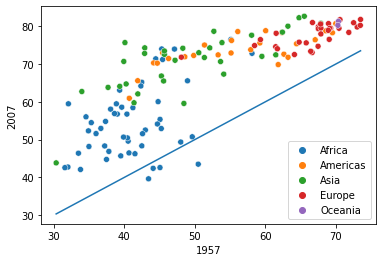

In [59]:
#visualizing the change in life expectancy of all countries in 2007 as compared to that in 1957, i.e., the overall change in life expectancy in 50 years. 
sns.scatterplot(data = data_wide, x = 1957,y=2007,hue = 'continent')
sns.lineplot(data = data_wide, x = 1957,y = 1957)

Observe that for some African countries, the life expectancy has decreased after 50 years. It is worth investigating these countries to identify factors associated with the decrease.

#### Pivoting multiple columns

In the above transformation, we retained only `lifeExp` in the *'wide'* dataset. Suppose, we are also interested in visualizing GDP per capita of countries in one year against another year. In that case, we must have `gdpPercap` in the *'wide*'-form data as well.

Let us create a dataset named as `data_wide_lifeExp_gdpPercap` that will contain both `lifeExp` and `gdpPercap` for each year in a separate column. We will specify the columns to pivot in the *values* argument of the `pivot()` function.

In [111]:
data_wide_lifeExp_gdpPercap = data_all_continents.pivot(index = ['continent','country'],columns = 'year',values = ['lifeExp','gdpPercap'])
data_wide_lifeExp_gdpPercap.head()

lifeExp                                          \
year                      1952    1957    1962    1967    1972    1977   
continent country                                                        
Africa    Algeria       43.077  45.685  48.303  51.407  54.518  58.014   
          Angola        30.015  31.999  34.000  35.985  37.928  39.483   
          Benin         38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana      47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso  31.975  34.906  37.814  40.697  43.591  46.137   

                                                        ...    gdpPercap  \
year                      1982    1987    1992    1997  ...         1962   
continent country                                       ...                
Africa    Algeria       61.368  65.799  67.744  69.152  ...  2550.816880   
          Angola        39.942  39.906  40.647  40.963  ...  4269.276742   
          Benin         50.904  52.337  53.919  54.777  ...   949.499064   
          Botswana      61.484  63.622  62.745  52.556  ...   983.653976   
          Burkina Faso  48.122  49.557  50.260  50.324  ...   722.512021   

                                                                            \
year                           1967         1972         1977         1982   
continent country                                                            
Africa    Algeria       3246.991771  4182.663766  4910.416756  5745.160213   
          Angola        5522.776375  5473.288005  3008.647355  2756.953672   
          Benin         1035.831411  1085.796879  1029.161251  1277.897616   
          Botswana      1214.709294  2263.611114  3214.857818  4551.142150   
          Burkina Faso   794.826560   854.735976   743.387037   807.198586   

                                                                             \
year                           1987         1992         1997          2002   
continent country                                                             
Africa    Algeria       5681.358539  5023.216647  4797.295051   5288.040382   
          Angola        2430.208311  2627.845685  2277.140884   2773.287312   
          Benin         1225.856010  1191.207681  1232.975292   1372.877931   
          Botswana      6205.883850  7954.111645  8647.142313  11003.605080   
          Burkina Faso   912.063142   931.752773   946.294962   1037.645221   

                                      
year                            2007  
continent country                     
Africa    Algeria        6223.367465  
          Angola         4797.231267  
          Benin          1441.284873  
          Botswana      12569.851770  
          Burkina Faso   1217.032994  

[5 rows x 24 columns]

The metric for each year is now in a separate column, and can be visualized directly. Note that re-arranging the dataset from the *'long'*-form to *'wide-form'* leads to hierarchical indexing of columns when multiple *'values'* need to be re-arranged. In this case, the multiple *'values'* that need to be re-arranged are `lifeExp` and `gdpPercap`.

### Melting "wide" to "long" format

#### [`melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) {-}

This function is used to re-arrange the dataset from the *'wide'* form to the *'long'* form.

#### Melting columns with a single type of value

Let us consider `data_wide` created in the previous section. 

In [114]:
data_wide.head()

year                      1952    1957    1962    1967    1972    1977  \
continent country                                                        
Africa    Algeria       43.077  45.685  48.303  51.407  54.518  58.014   
          Angola        30.015  31.999  34.000  35.985  37.928  39.483   
          Benin         38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana      47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso  31.975  34.906  37.814  40.697  43.591  46.137   

year                      1982    1987    1992    1997    2002    2007  
continent country                                                       
Africa    Algeria       61.368  65.799  67.744  69.152  70.994  72.301  
          Angola        39.942  39.906  40.647  40.963  41.003  42.731  
          Benin         50.904  52.337  53.919  54.777  54.406  56.728  
          Botswana      61.484  63.622  62.745  52.556  46.634  50.728  
          Burkina Faso  48.122  49.557  50.260  50.324  50.650  52.295

Suppose, we wish to visualize the change of life expectancy over time for different continents, as we did in section [8.3](https://nustat.github.io/DataScience_Intro_python/Data%20wrangling.html#concatenating-datasets). For plotting `lifeExp` against `year`, all the years must be in a single column. Thus, we need to *melt* the columns of `data_wide` to a single column and call it `year`.

But before melting the columns in the above dataset, we will convert `continent` to a column, as we need to make subplots based on continent.

The Pandas DataFrame method [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) can be used to remove one or more levels of indexing from the DataFrame.

In [94]:
#Making 'continent' a column instead of row-index at level 0
data_wide.reset_index(inplace=True,level=0)
data_wide.head()

year,continent,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,,
Algeria,Africa,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
Angola,Africa,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
Benin,Africa,38.223,40.358,42.618,44.885,47.014,49.190,50.904,52.337,53.919,54.777,54.406,56.728
Botswana,Africa,47.622,49.618,51.520,53.298,56.024,59.319,61.484,63.622,62.745,52.556,46.634,50.728
Burkina Faso,Africa,31.975,34.906,37.814,40.697,43.591,46.137,48.122,49.557,50.260,50.324,50.650,52.295


In [96]:
data_melted=pd.melt(data_wide,id_vars = ['continent'],var_name = 'Year',value_name = 'LifeExp')
data_melted.head()

,continent,Year,LifeExp
0,Africa,1952,43.077
1,Africa,1952,30.015
2,Africa,1952,38.223
3,Africa,1952,47.622
4,Africa,1952,31.975


With the above DataFrame, we can visualize the mean life expectancy against year separately for each continent.

If we wish to have country also in the above data, we can keep it while resetting the index:

In [104]:
#Creating 'data_wide' again
data_wide = data_all_continents.pivot(index = ['continent','country'],columns = 'year',values = 'lifeExp')

#Resetting the row-indices to default values
data_wide.reset_index(inplace=True)
data_wide.head()

year,continent,country,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
0,Africa,Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
1,Africa,Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
2,Africa,Benin,38.223,40.358,42.618,44.885,47.014,49.190,50.904,52.337,53.919,54.777,54.406,56.728
3,Africa,Botswana,47.622,49.618,51.520,53.298,56.024,59.319,61.484,63.622,62.745,52.556,46.634,50.728
4,Africa,Burkina Faso,31.975,34.906,37.814,40.697,43.591,46.137,48.122,49.557,50.260,50.324,50.650,52.295


In [106]:
#Melting the 'year' column
data_melted=pd.melt(data_wide,id_vars = ['continent','country'],var_name = 'Year',value_name = 'LifeExp')
data_melted.head()

,continent,country,Year,LifeExp
0,Africa,Algeria,1952,43.077
1,Africa,Angola,1952,30.015
2,Africa,Benin,1952,38.223
3,Africa,Botswana,1952,47.622
4,Africa,Burkina Faso,1952,31.975


#### Melting columns with multiple types of values

Consider the dataset created in Section [8.4.1.2](https://nustat.github.io/DataScience_Intro_python/Data%20wrangling.html#pivoting-multiple-columns). It has two types of values - `lifeExp` and `gdpPercapita`, which are the column labels at the outer level. The `melt()` function will melt all the years of data into a single column. However, it will create another column based on the outer level column labels - `lifeExp` and `gdpPercapita` to distinguish between these two types of values. Here, we see that the function `melt()` internally uses hierarchical indexing to handle the transformation of multiple types of columns.

In [121]:
data_melt = pd.melt(data_wide_lifeExp_gdpPercap.reset_index(),id_vars = ['continent','country'],var_name = ['Metric','year'])
data_melt.head()

,continent,country,Metric,year,value
0,Africa,Algeria,lifeExp,1952,43.077
1,Africa,Angola,lifeExp,1952,30.015
2,Africa,Benin,lifeExp,1952,38.223
3,Africa,Botswana,lifeExp,1952,47.622
4,Africa,Burkina Faso,lifeExp,1952,31.975


Although the data above is in *'long'*-form, it is not quiet in its original format, as in `data_all_continents`. We need to pivot again by `Metric` to have two separate columns of `gdpPercap` and `lifeExp`.

In [122]:
data_restore = data_melt.pivot(index = ['continent','country','year'],columns = 'Metric')
data_restore.head()

value        
Metric                    gdpPercap lifeExp
continent country year                     
Africa    Algeria 1952  2449.008185  43.077
                  1957  3013.976023  45.685
                  1962  2550.816880  48.303
                  1967  3246.991771  51.407
                  1972  4182.663766  54.518

Now, we can convert the row indices of `continent` and `country` to columns to restore the dataset to the same form as `data_all_continents`.

In [123]:
data_restore.reset_index(inplace = True)
data_restore.head()

continent  country  year        value        
Metric                             gdpPercap lifeExp
0         Africa  Algeria  1952  2449.008185  43.077
1         Africa  Algeria  1957  3013.976023  45.685
2         Africa  Algeria  1962  2550.816880  48.303
3         Africa  Algeria  1967  3246.991771  51.407
4         Africa  Algeria  1972  4182.663766  54.518

### Practice exercise 5

#### 
Both `unstack()` and `pivot()` seem to transform the data from the *'long'* form to the *'wide'* form. Is there a difference between the two functions?

**Solution:**

Yes, both the functions transform the data from the *'long'* form to the *'wide'* form. However, `unstack()` pivots the row indices, while `pivot()` pivots the columns of the DataFrame. 

Even though both functions are a bit different, it is possible to just use one of them to perform a reshaping operation. If we wish to pivot a column, we can either use `pivot()` directly on the column, or we can convert the column to row indices and then use `unstack()`. If we wish to pivot row indices, we can either use `unstack()` directly on the row indices, or we can convert row indices to a column and then use `pivot()`. 

To summarise, using one function may be more straightforward than using the other one, but either can be used for reshaping data from the *'long'* form to the *'wide'* form.

Below is an example where we perform the same reshaping operation with either function.

Consider the data `data_all_continent`. Suppose we wish to transform it to `data_wide` as we did using `pivot()` in Section [8.4.1.1](https://nustat.github.io/DataScience_Intro_python/Data%20wrangling.html#pivoting-a-single-column). Let us do it using `unstack()`, instead of `pivot()`. 

The first step will be to reindex data to set `year` as row indices, and also `continent` and `country` as row indices because these two column were set as indices with the `pivot()` function in Section [8.4.1.1](https://nustat.github.io/DataScience_Intro_python/Data%20wrangling.html#pivoting-a-single-column).

In [15]:
#Reindexing data to make 'continent', 'country', and 'year' as hierarchical row indices
data_reindexed=data_all_continents.set_index(['continent','country','year'])
data_reindexed

lifeExp       pop     gdpPercap
continent country     year                                 
Asia      Afghanistan 1952   28.801   8425333    779.445314
                      1957   30.332   9240934    820.853030
                      1962   31.997  10267083    853.100710
                      1967   34.020  11537966    836.197138
                      1972   36.088  13079460    739.981106
...                             ...       ...           ...
Americas  Venezuela   1987   70.190  17910182   9883.584648
                      1992   71.150  20265563  10733.926310
                      1997   72.146  22374398  10165.495180
                      2002   72.766  24287670   8605.047831
                      2007   73.747  26084662  11415.805690

[1704 rows x 3 columns]

Now we can use `unstack()` to pivot the desired row index, i.e., `year`. Also, since we are only interested in pivoting the values of `lifeExp` (as in the example in Section [8.4.1.1](https://nustat.github.io/DataScience_Intro_python/Data%20wrangling.html#pivoting-a-single-column)), we will filter the pivoted data with the `lifeExp` column label.

In [19]:
data_wide_with_unstack=data_reindexed.unstack('year')['lifeExp']
data_wide_with_unstack

year                        1952    1957    1962    1967    1972    1977  \
continent country                                                          
Africa    Algeria         43.077  45.685  48.303  51.407  54.518  58.014   
          Angola          30.015  31.999  34.000  35.985  37.928  39.483   
          Benin           38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana        47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso    31.975  34.906  37.814  40.697  43.591  46.137   
...                          ...     ...     ...     ...     ...     ...   
Europe    Switzerland     69.620  70.560  71.320  72.770  73.780  75.390   
          Turkey          43.585  48.079  52.098  54.336  57.005  59.507   
          United Kingdom  69.180  70.420  70.760  71.360  72.010  72.760   
Oceania   Australia       69.120  70.330  70.930  71.100  71.930  73.490   
          New Zealand     69.390  70.260  71.240  71.520  71.890  72.220   

year                        1982    1987    1992    1997    2002    2007  
continent country                                                         
Africa    Algeria         61.368  65.799  67.744  69.152  70.994  72.301  
          Angola          39.942  39.906  40.647  40.963  41.003  42.731  
          Benin           50.904  52.337  53.919  54.777  54.406  56.728  
          Botswana        61.484  63.622  62.745  52.556  46.634  50.728  
          Burkina Faso    48.122  49.557  50.260  50.324  50.650  52.295  
...                          ...     ...     ...     ...     ...     ...  
Europe    Switzerland     76.210  77.410  78.030  79.370  80.620  81.701  
          Turkey          61.036  63.108  66.146  68.835  70.845  71.777  
          United Kingdom  74.040  75.007  76.420  77.218  78.471  79.425  
Oceania   Australia       74.740  76.320  77.560  78.830  80.370  81.235  
          New Zealand     73.840  74.320  76.330  77.550  79.110  80.204  

[142 rows x 12 columns]

The above dataset is the same as that obtained using the `pivot()` function in Section [8.4.1.1](https://nustat.github.io/DataScience_Intro_python/Data%20wrangling.html#pivoting-a-single-column).

#### 
Both `stack()` and `melt()` seem to transform the data from the *'wide'* form to the *'long'* form. Is there a difference between the two functions?

**Solution:**

Following the trend of the previous question, we can always use `stack()` instead of `melt()` and vice-versa. The main difference is that `melt()` lets us choose the indentifier columns with the argument `id_vars`. However, if we use `stack()`, we will need to set the relevant melted row indices as columns. On the other hand, if we wished to have the melted columns as row indices, we can either directly use `stack()` or use `melt()` and then set the desired columns as row indices.

To summarise, using one function may be more straightforward than using the other one, but either can be used for reshaping data from the *'wide'* form to the *'long'* form.

Let us melt the data `data_wide_with_unstack` using the `stack()` function to obtain the same dataset as obtained with the `melt()` function in Section [8.4.1.2](https://nustat.github.io/DataScience_Intro_python/Data%20wrangling.html#melting-columns-with-a-single-type-of-value).

In [25]:
#Stacking the data
data_stacked = data_wide_with_unstack.stack()
data_stacked

continent  country      year
Africa     Algeria      1952    43.077
                        1957    45.685
                        1962    48.303
                        1967    51.407
                        1972    54.518
                                 ...  
Oceania    New Zealand  1987    74.320
                        1992    76.330
                        1997    77.550
                        2002    79.110
                        2007    80.204
Length: 1704, dtype: float64

Now we need to convert the row indices `continent` and `country` to columns as in the melted data in Section [8.4.1.2](https://nustat.github.io/DataScience_Intro_python/Data%20wrangling.html#melting-columns-with-a-single-type-of-value).

In [29]:
#Putting 'continent' and 'country' as columns
data_long_with_stack = data_stacked.reset_index()
data_long_with_stack

,continent,country,year,0
0,Africa,Algeria,1952,43.077
1,Africa,Algeria,1957,45.685
2,Africa,Algeria,1962,48.303
3,Africa,Algeria,1967,51.407
4,Africa,Algeria,1972,54.518
...,...,...,...,...
1699,Oceania,New Zealand,1987,74.320
1700,Oceania,New Zealand,1992,76.330
1701,Oceania,New Zealand,1997,77.550
1702,Oceania,New Zealand,2002,79.110


Finally, we need to rename the column named as 0 to `LifeExp` to obtain the same dataset as in Section [8.4.1.2](https://nustat.github.io/DataScience_Intro_python/Data%20wrangling.html#melting-columns-with-a-single-type-of-value).

In [31]:
#Renaming column 0 to 'LifeExp'
data_long_with_stack.rename(columns = {0:'LifeExp'},inplace=True)
data_long_with_stack

,continent,country,year,LifeExp
0,Africa,Algeria,1952,43.077
1,Africa,Algeria,1957,45.685
2,Africa,Algeria,1962,48.303
3,Africa,Algeria,1967,51.407
4,Africa,Algeria,1972,54.518
...,...,...,...,...
1699,Oceania,New Zealand,1987,74.320
1700,Oceania,New Zealand,1992,76.330
1701,Oceania,New Zealand,1997,77.550
1702,Oceania,New Zealand,2002,79.110
